#### 0. Import all modules

In [1]:
import sys
import os
import numpy as np
from numpy import mean
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import julian
import datetime

from statistics import stdev
from statistics import mean

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

Beuermann_2011.dat*                 Weighted_mean_calculation_gp14.txt*
Beuermann_2011.out*                 Weighted_mean_calculation_gp15.txt*
Kittipong_2020.dat*                 Weighted_mean_calculation_gp16.txt*
Kittipong_2020.out*                 Weighted_mean_calculation_gp17.txt*
OC_Beuermann_2011.jpg*              Weighted_mean_calculation_gp18.txt*
OC_Schwope_2002.jpg*                Weighted_mean_calculation_gp2.txt*
Schwope_2002.dat*                   Weighted_mean_calculation_gp3.txt*
Schwope_2002.out*                   Weighted_mean_calculation_gp4.txt*
Weighted_mean_calculation.ipynb*    Weighted_mean_calculation_gp5.txt*
Weighted_mean_calculation.jpg*      Weighted_mean_calculation_gp6.txt*
Weighted_mean_calculation_gp1.txt*  Weighted_mean_calculation_gp7.txt*
Weighted_mean_calculation_gp10.txt* Weighted_mean_calculation_gp8.txt*
Weighted_mean_calculation_gp11.txt* Weighted_mean_calculation_gp9.txt*
Weighted_mean_calculation_gp12.txt* Weighted_mean_calculation_rev1.jpg*


#### 1. Read input file: Schwope_2002

In [3]:
DP_Leo_Schwope_2002 = open("Schwope_2002.dat",'r').readlines()
N_dpleo_Schwope_2002 = len(DP_Leo_Schwope_2002)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Schwope_2002.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

#### 2. Check the year and the local time of observation: Schwope_2002

In [4]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Schwope_2002))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Schwope_2002)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 44214.55325 1979-12-07 13:16:40.799989
1 44214.61562 1979-12-07 14:46:29.567984
2 44214.67798 1979-12-07 16:16:17.472013
3 44968.02309 1981-12-30 00:33:14.975982
4 44968.95712 1981-12-30 22:58:15.167993
5 44969.01962 1981-12-31 00:28:15.167993
6 44978.99755 1982-01-09 23:56:28.319997
7 44993.90078 1982-01-24 21:37:07.391982
8 44993.96328 1982-01-24 23:07:07.391982
9 44994.02642 1982-01-25 00:38:02.688000
10 45020.90513 1982-02-20 21:43:23.231987
11 45021.90292 1982-02-21 21:40:12.287981
12 45024.83386 1982-02-24 20:00:45.504011
13 45731.9664 1984-02-01 23:11:36.959982
14 45763.83373 1984-03-04 20:00:34.272006
15 45854.8828 1984-06-03 21:11:13.919981
16 46054.94231 1984-12-20 22:36:55.583986
17 46086.93565 1985-01-21 22:27:20.159989
18 46086.99796 1985-01-21 23:57:03.743985
19 48560.5578 1991-10-31 13:23:13.920005
20 48773.21509 1992-05-31 05:09:43.776006
21 48774.21293 1992-06-01 05:06:37.151993
22 49137.91294 1993-05-30 21:54:38.016015
23 49143.96214 1993-06-05 23:05:28.895996
24 49

#### 3. DP Leo parameters 

In [5]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#T0_bjd = 2448773.21461 - 2400000
#T0_bjd_err = 0.00009
P0_day = 0.0623628426
P0_day_err = 0.0000000006

T0_bjd = 2456717.36832561 - 2400000
T0_bjd_err = 0.000000001

#### 4. Arrays of Schwope_2002 

In [6]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT_err = [i for i in range(N_dpleo_Schwope_2002)]
E_af = [i for i in range(N_dpleo_Schwope_2002)] #float number
E_ak = [i for i in range(N_dpleo_Schwope_2002)] #integer number
E_aj = [i for i in range(N_dpleo_Schwope_2002)] #integer number
P_aE = [i for i in range(N_dpleo_Schwope_2002)]
P_err_aE = [i for i in range(N_dpleo_Schwope_2002)]
T_aC_linear = [i for i in range(N_dpleo_Schwope_2002)]
T_aO_linear = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_a = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_std_a = [i for i in range(N_dpleo_Schwope_2002)]

#### 5. The O-C calculation of Schwope_2002 

In [7]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Schwope_2002):
    BJD_time = np.array(T_obs)+delta_tdb_tt + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Schwope_2002.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2444214.553250	-73099	44214.553250	44214.553827	-49.848409	18.248615
1	2444214.615620	-73098	44214.615620	44214.616190	-49.230010	18.248585
2	2444214.677980	-73097	44214.677980	44214.678553	-49.475610	18.248556
3	2444968.023090	-61017	44968.023090	44968.021691	120.852659	100.475958
4	2444968.957120	-61002	44968.957120	44968.957134	-1.199351	100.475882
5	2444969.019620	-61001	44969.019620	44969.019497	10.651048	100.475877
6	2444978.997550	-60841	44978.997550	44978.997552	-0.133054	100.475071
7	2444993.900780	-60602	44993.900780	44993.902271	-128.815606	60.785807
8	2444993.963280	-60601	44993.963280	44993.964634	-116.965207	60.785799
9	2444994.026420	-60600	44994.026420	44994.026997	-49.818809	60.785791
10	2445020.905130	-60169	45020.905130	45020.905382	-21.752685	22.237924
11	2445021.902920	-60153	45021.902920	45021.903187	-23.090295	22.237561
12	2445024.833860	-60106	45024.833860	45024.834241	-32.905525	60.781690
13	

#### 6. The O-C diagram of Schwope_2002  

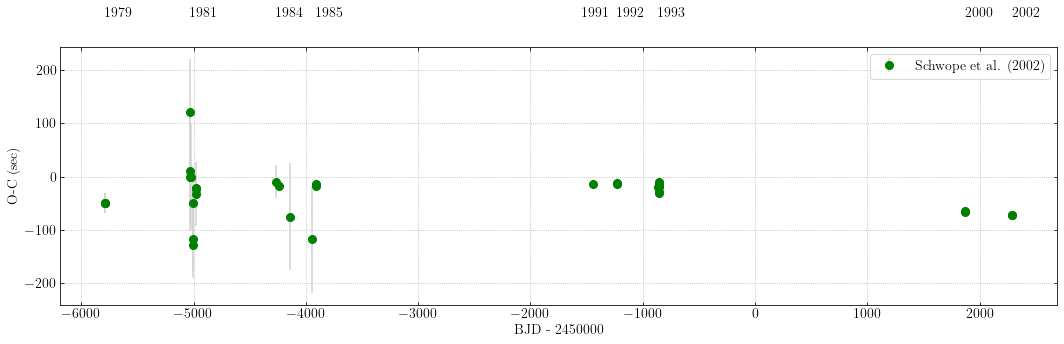

In [8]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0] - N
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')

#Schwope_2002
plt.text(BJD_time_Schwope_2002[0], 300, '1979')
plt.text(BJD_time_Schwope_2002[3], 300, '1981')
plt.text(BJD_time_Schwope_2002[13], 300, '1984')
plt.text(BJD_time_Schwope_2002[17], 300, '1985')
plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
plt.text(BJD_time_Schwope_2002[20], 300, '1992')
plt.text(BJD_time_Schwope_2002[22], 300, '1993')
plt.text(BJD_time_Schwope_2002[30], 300, '2000')
plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

#### 7. Group the data for calculating weighted mean: Schwope_2002

In [9]:
#Checkinng month,year from BJD
BJD_time = Data_Schwope_2002[:,0] - 2400000
OC_s = Data_Schwope_2002[:,4]
OC_s_err = Data_Schwope_2002[:,5]


gp1 = []
gp2 = []
gp3 = []
gp4 = []
gp5 = []
gp6 = []
gp7 = []
gp8 = []
gp9 = []

print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[0] >= BJD_time[i]:        #gp1
        gp1.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[12] >= BJD_time[i]:       #gp2
        gp2.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[16] >= BJD_time[i]:       #gp3
        gp3.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[18] >= BJD_time[i]:       #gp4
        gp4.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[19] >= BJD_time[i]:       #gp5
        gp5.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[21] >= BJD_time[i]:       #gp6
        gp6.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[29] >= BJD_time[i]:       #gp7
        gp7.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[31] >= BJD_time[i]:       #gp8
        gp8.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[33] >= BJD_time[i]:       #gp9
        gp9.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    
#-------------------------- Group1 -----------#        
rerults = gp1
f = open('Weighted_mean_calculation_gp1.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group2 -----------#        
rerults = gp2
f = open('Weighted_mean_calculation_gp2.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group3 -----------#        
rerults = gp3
f = open('Weighted_mean_calculation_gp3.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group4 -----------#        
rerults = gp4
f = open('Weighted_mean_calculation_gp4.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group5 -----------#        
rerults = gp5
f = open('Weighted_mean_calculation_gp5.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group6 -----------#        
rerults = gp6
f = open('Weighted_mean_calculation_gp6.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group7 -----------#        
rerults = gp7
f = open('Weighted_mean_calculation_gp7.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group8 -----------#        
rerults = gp8
f = open('Weighted_mean_calculation_gp8.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group9 -----------#        
rerults = gp9
f = open('Weighted_mean_calculation_gp9.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 1979-12-07 13:16:40.799989 44214.55324999988 -49.848409 18.248615
1 1979-12-07 14:46:29.567984 44214.61561999982 -49.23001 18.248585
2 1979-12-07 16:16:17.472013 44214.67798000015 -49.47561 18.248556
3 1981-12-30 00:33:14.975982 44968.0230899998 120.852659 100.475958
4 1981-12-30 22:58:15.167993 44968.95711999992 -1.199351 100.475882
5 1981-12-31 00:28:15.167993 44969.01961999992 10.651048 100.475877
6 1982-01-09 23:56:28.319997 44978.99754999997 -0.133054 100.475071
7 1982-01-24 21:37:07.391982 44993.90077999979 -128.815606 60.785807
8 1982-01-24 23:07:07.391982 44993.96327999979 -116.965207 60.785799
9 1982-01-25 00:38:02.688000 44994.02642000001 -49.818809 60.785791
10 1982-02-20 21:43:23.231987 45020.905129999854 -21.752685 22.237924
11 1982-02-21 21:40:12.287981 45021.90291999979 -23.090295 22.237561
12 1982-02-24 20:00:45.504011 45024.83386000013 -32.905525 60.78169
13 1984-02-01 23:11:36.959982 45731.9663999998 -9.771182

In [10]:
ls

Beuermann_2011.dat*                 Weighted_mean_calculation_gp14.txt*
Beuermann_2011.out*                 Weighted_mean_calculation_gp15.txt*
Kittipong_2020.dat*                 Weighted_mean_calculation_gp16.txt*
Kittipong_2020.out*                 Weighted_mean_calculation_gp17.txt*
OC_Beuermann_2011.jpg*              Weighted_mean_calculation_gp18.txt*
OC_Schwope_2002.jpg*                Weighted_mean_calculation_gp2.txt*
Schwope_2002.dat*                   Weighted_mean_calculation_gp3.txt*
Schwope_2002.out*                   Weighted_mean_calculation_gp4.txt*
Weighted_mean_calculation.ipynb*    Weighted_mean_calculation_gp5.txt*

Weighted_mean_calculation_gp1.txt*  Weighted_mean_calculation_gp7.txt*
Weighted_mean_calculation_gp10.txt* Weighted_mean_calculation_gp8.txt*
Weighted_mean_calculation_gp11.txt* Weighted_mean_calculation_gp9.txt*
Weighted_mean_calculation_gp12.txt* Weighted_mean_calculation_rev1.jpg*
Weighted_mean_calculation_gp13.txt*


#### 8. Check number of data for each group

In [11]:
#The 1st set of data point:
Input_gp1 = "Weighted_mean_calculation_gp1.txt"
Data_gp1   = np.genfromtxt(Input_gp1)
N_data_gp1 = len(Data_gp1)
print('Number of data group#1:',N_data_gp1)

#The 2nd set of data point:
Input_gp2 = "Weighted_mean_calculation_gp2.txt"
Data_gp2   = np.genfromtxt(Input_gp2)
N_data_gp2 = len(Data_gp2)
print('Number of data group#2:',N_data_gp2)

#The 3rd set of data point:
Input_gp3 = "Weighted_mean_calculation_gp3.txt"
Data_gp3   = np.genfromtxt(Input_gp3)
N_data_gp3 = len(Data_gp3)
print('Number of data group#3:',N_data_gp3)

#The 4th set of data point:
Input_gp4 = "Weighted_mean_calculation_gp4.txt"
Data_gp4   = np.genfromtxt(Input_gp4)
N_data_gp4 = len(Data_gp4)
print('Number of data group#4:',N_data_gp4)

#The 5th set of data point:
Input_gp5 = "Weighted_mean_calculation_gp5.txt"
Data_gp5   = np.genfromtxt(Input_gp5)
N_data_gp5 = len(Data_gp5)
print('Number of data group#5:',N_data_gp5)

#The 6th set of data point:
Input_gp6 = "Weighted_mean_calculation_gp6.txt"
Data_gp6   = np.genfromtxt(Input_gp6)
N_data_gp6 = len(Data_gp6)
print('Number of data group#6:',N_data_gp6)

#The 7th set of data point:
Input_gp7 = "Weighted_mean_calculation_gp7.txt"
Data_gp7   = np.genfromtxt(Input_gp7)
N_data_gp7 = len(Data_gp7)
print('Number of data group#7:',N_data_gp7)

#The 8th set of data point:
Input_gp8 = "Weighted_mean_calculation_gp8.txt"
Data_gp8   = np.genfromtxt(Input_gp8)
N_data_gp8 = len(Data_gp8)
print('Number of data group#8:',N_data_gp8)

#The 9th set of data point:
Input_gp9 = "Weighted_mean_calculation_gp9.txt"
Data_gp9   = np.genfromtxt(Input_gp9)
N_data_gp9 = len(Data_gp9)
print('Number of data group#9:',N_data_gp9)

Number of data group#1: 3
Number of data group#2: 12
Number of data group#3: 4
Number of data group#4: 2
Number of data group#5: 3
Number of data group#6: 2
Number of data group#7: 8
Number of data group#8: 2
Number of data group#9: 2


#### 10. Weighted mean calculation 

In [12]:
#Group1
x1_aver = 44214.553249999881
y1_aver = -49.848409
y1_std = 18.248615

In [13]:
#Group2
OC_a2 = [i for i in range(N_data_gp2)]
OC_err_a2 = [i for i in range(N_data_gp2)]
w_a2 = [i for i in range(N_data_gp2)]
y_a2 = [i for i in range(N_data_gp2)]

for i in range(N_data_gp2):
    BJD_time = Data_gp2[:,0]                   #Input file of x
    OC_s = Data_gp2[:,1]                       #Input file of y
    OC_a2[i] = OC_s 
    OC_s_err = Data_gp2[:,2]                   #Input file of y_err
    OC_err_a2[i] = OC_s_err
    w = 1/(OC_err_a2[i])**2                    #calculate the weighting factor
    w_a2[i] = w
    y = (w_a2[i]*OC_a2[i])                     #Calculate the weighting factor and the y-value
    y_a2[i] = y
    y_sum = np.sum(y_a2)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a2)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x2_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y2_aver = y_sum/w_sum                         #Calculate the weighted mean
y2_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x2_aver)                   #Print Mean BJD
print('Weighted OC:', y2_aver)                #Print the weighted mean
print('Weighted OC_err:',y2_std)              #Print the error of the weighted mean

Mean BJD: 44863.651947499915
Weighted OC: -40.168194925667855
Weighted OC_err: 9.31331424852885


In [14]:
#Group3
OC_a3 = [i for i in range(N_data_gp3)]
OC_err_a3 = [i for i in range(N_data_gp3)]
w_a3 = [i for i in range(N_data_gp3)]
y_a3 = [i for i in range(N_data_gp3)]

for i in range(N_data_gp3):
    BJD_time = Data_gp3[:,0]                   #Input file of x
    OC_s = Data_gp3[:,1]                       #Input file of y
    OC_a3[i] = OC_s 
    OC_s_err = Data_gp3[:,2]                   #Input file of y_err
    OC_err_a3[i] = OC_s_err
    w = 1/(OC_err_a3[i])**2                    #calculate the weighting factor
    w_a3[i] = w
    y = (w_a3[i]*OC_a3[i])                     #Calculate the weighting factor and the y-value
    y_a3[i] = y
    y_sum = np.sum(y_a3)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a3)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x3_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y3_aver = y_sum/w_sum                         #Calculate the weighted mean
y3_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x3_aver)                   #Print Mean BJD
print('Weighted OC:', y3_aver)                #Print the weighted mean
print('Weighted OC_err:',y3_std)              #Print the error of the weighted mean

Mean BJD: 45851.406309999875
Weighted OC: -17.725352507860368
Weighted OC_err: 9.767033987863462


In [15]:
#Group4
OC_a4 = [i for i in range(N_data_gp4)]
OC_err_a4 = [i for i in range(N_data_gp4)]
w_a4 = [i for i in range(N_data_gp4)]
y_a4 = [i for i in range(N_data_gp4)]

for i in range(N_data_gp4):
    BJD_time = Data_gp4[:,0]                   #Input file of x
    OC_s = Data_gp4[:,1]                       #Input file of y
    OC_a4[i] = OC_s 
    OC_s_err = Data_gp4[:,2]                   #Input file of y_err
    OC_err_a4[i] = OC_s_err
    w = 1/(OC_err_a4[i])**2                    #calculate the weighting factor
    w_a4[i] = w
    y = (w_a4[i]*OC_a4[i])                     #Calculate the weighting factor and the y-value
    y_a4[i] = y
    y_sum = np.sum(y_a4)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a4)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x4_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y4_aver = y_sum/w_sum                         #Calculate the weighted mean
y4_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x4_aver)                   #Print Mean BJD
print('Weighted OC:', y4_aver)                #Print the weighted mean
print('Weighted OC_err:',y4_std)              #Print the error of the weighted mean

Mean BJD: 46086.96680499986
Weighted OC: -16.380836486491393
Weighted OC_err: 6.598678409111157


In [16]:
#Group5
x5_aver = 48560.557800000068
y5_aver = -14.247410
y5_std = 7.872520

In [17]:
#Group6
OC_a6 = [i for i in range(N_data_gp6)]
OC_err_a6 = [i for i in range(N_data_gp6)]
w_a6 = [i for i in range(N_data_gp6)]
y_a6 = [i for i in range(N_data_gp6)]

for i in range(N_data_gp6):
    BJD_time = Data_gp6[:,0]                   #Input file of x
    OC_s = Data_gp6[:,1]                       #Input file of y
    OC_a6[i] = OC_s 
    OC_s_err = Data_gp6[:,2]                   #Input file of y_err
    OC_err_a6[i] = OC_s_err
    w = 1/(OC_err_a6[i])**2                    #calculate the weighting factor
    w_a6[i] = w
    y = (w_a6[i]*OC_a6[i])                     #Calculate the weighting factor and the y-value
    y_a6[i] = y
    y_sum = np.sum(y_a6)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a6)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x6_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y6_aver = y_sum/w_sum                         #Calculate the weighted mean
y6_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x6_aver)                   #Print Mean BJD
print('Weighted OC:', y6_aver)                #Print the weighted mean
print('Weighted OC_err:',y6_std)              #Print the error of the weighted mean

Mean BJD: 48773.714009999996
Weighted OC: -13.03827899442811
Weighted OC_err: 5.856708421265374


In [18]:
#Group7
OC_a7 = [i for i in range(N_data_gp7)]
OC_err_a7 = [i for i in range(N_data_gp7)]
w_a7 = [i for i in range(N_data_gp7)]
y_a7 = [i for i in range(N_data_gp7)]

for i in range(N_data_gp7):
    BJD_time = Data_gp7[:,0]                   #Input file of x
    OC_s = Data_gp7[:,1]                       #Input file of y
    OC_a7[i] = OC_s 
    OC_s_err = Data_gp7[:,2]                   #Input file of y_err
    OC_err_a7[i] = OC_s_err
    w = 1/(OC_err_a7[i])**2                    #calculate the weighting factor
    w_a7[i] = w
    y = (w_a7[i]*OC_a7[i])                     #Calculate the weighting factor and the y-value
    y_a7[i] = y
    y_sum = np.sum(y_a7)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a7)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x7_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y7_aver = y_sum/w_sum                         #Calculate the weighted mean
y7_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x7_aver)                   #Print Mean BJD
print('Weighted OC:', y7_aver)                #Print the weighted mean
print('Weighted OC_err:',y7_std)              #Print the error of the weighted mean

Mean BJD: 49143.77505
Weighted OC: -18.912402197827934
Weighted OC_err: 2.8424044934339316


In [19]:
#Group8
OC_a8 = [i for i in range(N_data_gp8)]
OC_err_a8 = [i for i in range(N_data_gp8)]
w_a8 = [i for i in range(N_data_gp8)]
y_a8 = [i for i in range(N_data_gp8)]

for i in range(N_data_gp8):
    BJD_time = Data_gp8[:,0]                   #Input file of x
    OC_s = Data_gp8[:,1]                       #Input file of y
    OC_a8[i] = OC_s 
    OC_s_err = Data_gp8[:,2]                   #Input file of y_err
    OC_err_a8[i] = OC_s_err
    w = 1/(OC_err_a8[i])**2                    #calculate the weighting factor
    w_a8[i] = w
    y = (w_a8[i]*OC_a8[i])                     #Calculate the weighting factor and the y-value
    y_a8[i] = y
    y_sum = np.sum(y_a8)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a8)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x8_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y8_aver = y_sum/w_sum                         #Calculate the weighted mean
y8_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x8_aver)                   #Print Mean BJD
print('Weighted OC:', y8_aver)                #Print the weighted mean
print('Weighted OC_err:',y8_std)              #Print the error of the weighted mean

Mean BJD: 51870.839255
Weighted OC: -65.48697136682263
Weighted OC_err: 4.5403527943676085


In [20]:
#Group9
OC_a9 = [i for i in range(N_data_gp9)]
OC_err_a9 = [i for i in range(N_data_gp9)]
w_a9 = [i for i in range(N_data_gp9)]
y_a9 = [i for i in range(N_data_gp9)]

for i in range(N_data_gp9):
    BJD_time = Data_gp9[:,0]                   #Input file of x
    OC_s = Data_gp9[:,1]                       #Input file of y
    OC_a9[i] = OC_s 
    OC_s_err = Data_gp9[:,2]                   #Input file of y_err
    OC_err_a9[i] = OC_s_err
    w = 1/(OC_err_a9[i])**2                    #calculate the weighting factor
    w_a9[i] = w
    y = (w_a9[i]*OC_a9[i])                     #Calculate the weighting factor and the y-value
    y_a9[i] = y
    y_sum = np.sum(y_a9)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a9)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x9_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y9_aver = y_sum/w_sum                         #Calculate the weighted mean
y9_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x9_aver)                   #Print Mean BJD
print('Weighted OC:', y9_aver)                #Print the weighted mean
print('Weighted OC_err:',y9_std)              #Print the error of the weighted mean  

Mean BJD: 52284.71018000017
Weighted OC: -72.397288448938
Weighted OC_err: 2.7460136643281077


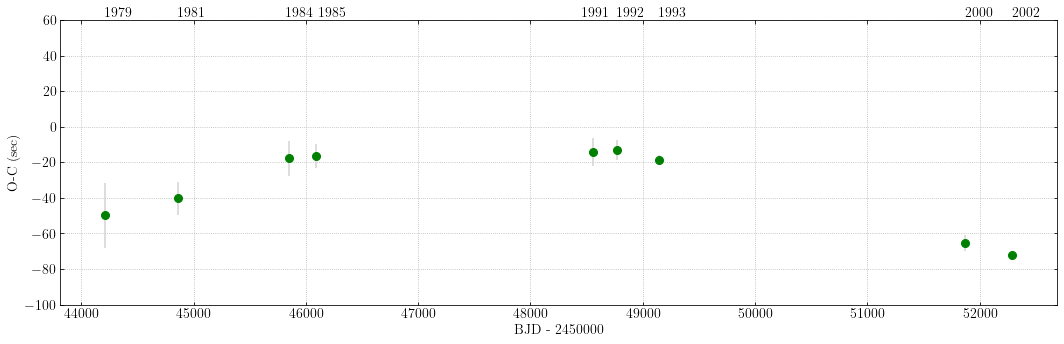

In [21]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

plt.errorbar(x1_aver, y1_aver, yerr = y1_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)
plt.errorbar(x2_aver, y2_aver, yerr = y2_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)
plt.errorbar(x3_aver, y3_aver, yerr = y3_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)
plt.errorbar(x4_aver, y4_aver, yerr = y4_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)
plt.errorbar(x5_aver, y5_aver, yerr = y5_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)
plt.errorbar(x6_aver, y6_aver, yerr = y6_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)
plt.errorbar(x7_aver, y7_aver, yerr = y7_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)
plt.errorbar(x8_aver, y8_aver, yerr = y8_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)
plt.errorbar(x9_aver, y9_aver, yerr = y9_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray',)

#Schwope_2002
plt.text(x1_aver, 62, '1979')
plt.text(x2_aver, 62, '1981')
plt.text(x3_aver-30, 62, '1984')
plt.text(x4_aver+30, 62, '1985')
plt.text(x5_aver-100, 62, '1991')
plt.text(x6_aver, 62, '1992')
plt.text(x7_aver, 62, '1993')
plt.text(x8_aver, 62, '2000')
plt.text(x9_aver, 62, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-100,60)
plt.xlabel('BJD - '+str(2450000))
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

#### 7. Read input file: Beuermann_2011

In [22]:
#Input file: Beuermann_2011
DP_Leo_Beuermann_2011 = open("Beuermann_2011.dat",'r').readlines()
N_dpleo_Beuermann_2011 = len(DP_Leo_Beuermann_2011)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Beuermann_2011.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

#### 8. Check the year and the local time of observation: Beuermann_2011

In [23]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Beuermann_2011))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Beuermann_2011)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 54914.83228 2009-03-24 19:58:28.992017
1 54914.894663 2009-03-24 21:28:18.883201
2 54916.827926 2009-03-26 19:52:12.806409
3 54919.696603 2009-03-29 16:43:06.499214
4 54920.756784 2009-03-30 18:09:46.137597
5 54922.627668 2009-04-01 15:03:50.515184
6 54922.690017 2009-04-01 16:33:37.468786
7 54922.752365 2009-04-01 18:03:24.336006
8 54922.814727 2009-04-01 19:33:12.412796
9 54937.781831 2009-04-16 18:45:50.198400
10 54937.844195 2009-04-16 20:15:38.447991
11 54938.717285 2009-04-17 17:12:53.423981
12 54938.779611 2009-04-17 18:42:38.390387
13 54940.650507 2009-04-19 15:36:43.804783
14 54940.712869 2009-04-19 17:06:31.881613
15 54940.775243 2009-04-19 18:36:20.995211
16 54940.837637 2009-04-19 20:06:11.836781
17 54941.773045 2009-04-20 18:33:11.088013
18 54941.835408 2009-04-20 20:02:59.251183
19 54942.646122 2009-04-21 15:30:24.940815
20 54942.770852 2009-04-21 18:30:01.612798
21 54942.833221 2009-04-21 19:59:50.294413
22 54942.895591 2009-04-21 21:29:39.062408
23 54943.706304 2009-0

#### 9. Arrays of Beuermann_2011

In [24]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Beuermann_2011)]
Delta_aT = [i for i in range(N_dpleo_Beuermann_2011)]
Delta_aT_err = [i for i in range(N_dpleo_Beuermann_2011)]
E_af = [i for i in range(N_dpleo_Beuermann_2011)] #float number
E_ak = [i for i in range(N_dpleo_Beuermann_2011)] #integer number
E_aj = [i for i in range(N_dpleo_Beuermann_2011)] #integer number
P_aE = [i for i in range(N_dpleo_Beuermann_2011)]
P_err_aE = [i for i in range(N_dpleo_Beuermann_2011)]
T_aC_linear = [i for i in range(N_dpleo_Beuermann_2011)]
T_aO_linear = [i for i in range(N_dpleo_Beuermann_2011)]
P_aver_a = [i for i in range(N_dpleo_Beuermann_2011)]
P_aver_std_a = [i for i in range(N_dpleo_Beuermann_2011)]

#### 10. The O-C calculation of Beuermann_2011

In [25]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Beuermann_2011):
    BJD_time = np.array(T_obs) + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 2
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Beuermann_2011.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2454914.832280	98482	54914.832280	54914.832723	-38.283821	1.822067
1	2454914.894663	98483	54914.894663	54914.895086	-36.542222	1.925596
2	2454916.827926	98514	54916.827926	54916.828334	-35.256642	2.096975
3	2454919.696603	98560	54919.696603	54919.697025	-36.445471	2.095274
4	2454920.756784	98577	54920.756784	54920.757193	-35.350282	2.034996
5	2454922.627668	98607	54922.627668	54922.628078	-35.460701	2.033855
6	2454922.690017	98608	54922.690017	54922.690441	-36.656701	1.723940
7	2454922.752365	98609	54922.752365	54922.752804	-37.939102	1.723895
8	2454922.814727	98610	54922.814727	54922.815167	-38.011903	1.768730
9	2454937.781831	98850	54937.781831	54937.782249	-36.130456	2.024633
10	2454937.844195	98851	54937.844195	54937.844612	-36.030457	1.806369
11	2454938.717285	98865	54938.717285	54938.717692	-35.148866	1.966072
12	2454938.779611	98866	54938.779611	54938.780055	-38.332067	1.712379
13	2454940.650507	98896	54940.65

#### 11. The O-C diagram of Beuermann_2011

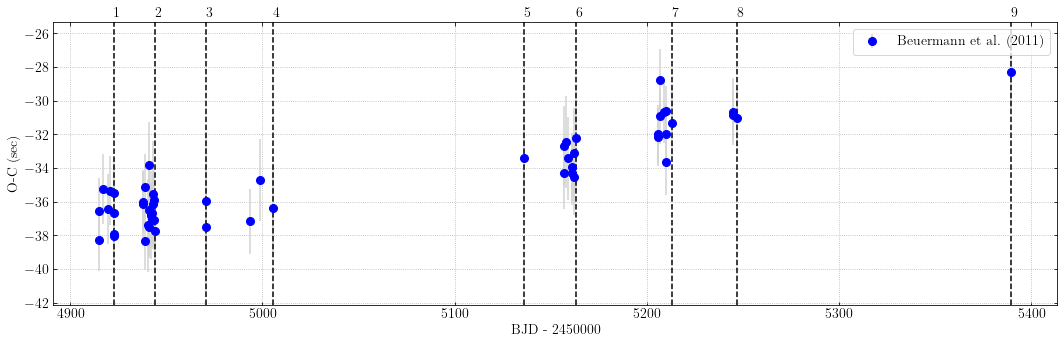

In [26]:
#Plot O-C vs BJD
Input_Beuermann_2011  = 'Beuermann_2011.out'
Data_Beuermann_2011   = np.genfromtxt(Input_Beuermann_2011)

N = 2450000
BJD_time_Beuermann_2011 = Data_Beuermann_2011[:,0] - N
Cycle_Beuermann_2011 = Data_Beuermann_2011[:,1]
T_O_linear_Beuermann_2011 = Data_Beuermann_2011[:,2]
T_C_linear_Beuermann_2011 = Data_Beuermann_2011[:,3]
OC_s_Beuermann_2011= Data_Beuermann_2011[:,4]
OC_s_err_Beuermann_2011 = Data_Beuermann_2011[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Beuermann_2011)
x2 = max(BJD_time_Beuermann_2011)
plt.errorbar(BJD_time_Beuermann_2011, OC_s_Beuermann_2011, yerr= OC_s_err_Beuermann_2011, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'Beuermann et al. (2011)')

#Beuermann_2011
#plt.text(BJD_time_Beuermann_2011[0], 38, '2002')
#plt.text(BJD_time_Beuermann_2011[1], 38, '2009')
#plt.text(BJD_time_Beuermann_2011[42], 38, '2010')

plt.axvline(x= BJD_time_Beuermann_2011[8], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[25], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[27], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[30], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[31], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[40], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[49], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[52], color='k', linestyle='--')
plt.axvline(x= BJD_time_Beuermann_2011[53], color='k', linestyle='--')

plt.text(BJD_time_Beuermann_2011[8], -25, '1')
plt.text(BJD_time_Beuermann_2011[25], -25, '2')
plt.text(BJD_time_Beuermann_2011[27], -25, '3')
plt.text(BJD_time_Beuermann_2011[30], -25, '4')
plt.text(BJD_time_Beuermann_2011[31], -25, '5')
plt.text(BJD_time_Beuermann_2011[40], -25, '6')
plt.text(BJD_time_Beuermann_2011[49], -25, '7')
plt.text(BJD_time_Beuermann_2011[52], -25, '8')
plt.text(BJD_time_Beuermann_2011[53], -25, '9')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Beuermann_2011.jpg", dpi=1000)
plt.show()

In [27]:
#Checkinng month,year from BJD
BJD_time = Data_Beuermann_2011[:,0] - 2400000
OC_s = Data_Beuermann_2011[:,4]
OC_s_err = Data_Beuermann_2011[:,5]


gp10 = []
gp11 = []
gp12 = []
gp13 = []
gp14 = []
gp15 = []
gp16 = []
gp17 = []
gp18 = []

print('No.year-month-day LT \t\t BJD- 2400000 \t OC(s) \t OC_err(s)')
for i in range(len(BJD_time)):
    LT = julian.from_jd(BJD_time[i], fmt='mjd')
    print(i, LT, BJD_time[i], OC_s[i], OC_s_err[i])
    if BJD_time[8] >= BJD_time[i]:        #gp10
        gp10.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[25] >= BJD_time[i]:       #gp11
        gp11.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[27] >= BJD_time[i]:       #gp12
        gp12.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[30] >= BJD_time[i]:       #gp13
        gp13.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[31] >= BJD_time[i]:       #gp14
        gp14.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[40] >= BJD_time[i]:       #gp15
        gp15.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[49] >= BJD_time[i]:       #gp16
        gp16.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[52] >= BJD_time[i]:       #gp17
        gp17.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    elif BJD_time[53] >= BJD_time[i]:       #gp18
        gp18.append('%0.12f %0.6f %0.6f' %(BJD_time[i], OC_s[i], OC_s_err[i]))
    
#-------------------------- Group10 -----------#        
rerults = gp10
f = open('Weighted_mean_calculation_gp10.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group11 -----------#        
rerults = gp11
f = open('Weighted_mean_calculation_gp11.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()
#-------------------------- Group12 -----------#        
rerults = gp12
f = open('Weighted_mean_calculation_gp12.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group13 -----------#        
rerults = gp13
f = open('Weighted_mean_calculation_gp13.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group14 -----------#        
rerults = gp14
f = open('Weighted_mean_calculation_gp14.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group15 -----------#        
rerults = gp15
f = open('Weighted_mean_calculation_gp15.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group16 -----------#        
rerults = gp16
f = open('Weighted_mean_calculation_gp16.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group17 -----------#        
rerults = gp17
f = open('Weighted_mean_calculation_gp17.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

#-------------------------- Group18 -----------#        
rerults = gp18
f = open('Weighted_mean_calculation_gp18.txt', 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No.year-month-day LT 		 BJD- 2400000 	 OC(s) 	 OC_err(s)
0 2009-03-24 19:58:28.992017 54914.832280000206 -38.283821 1.822067
1 2009-03-24 21:28:18.883201 54914.894663000014 -36.542222 1.925596
2 2009-03-26 19:52:12.806409 54916.827926000115 -35.256642 2.096975
3 2009-03-29 16:43:06.499214 54919.696603000164 -36.445471 2.095274
4 2009-03-30 18:09:46.137597 54920.75678399997 -35.350282 2.034996
5 2009-04-01 15:03:50.515184 54922.62766799983 -35.460701 2.033855
6 2009-04-01 16:33:37.468786 54922.69001699984 -36.656701 1.72394
7 2009-04-01 18:03:24.336006 54922.75236500008 -37.939102 1.723895
8 2009-04-01 19:33:12.412796 54922.81472699996 -38.011903 1.76873
9 2009-04-16 18:45:50.198400 54937.781831 -36.130456 2.024633
10 2009-04-16 20:15:38.447991 54937.844194999896 -36.030457 1.806369
11 2009-04-17 17:12:53.423981 54938.71728499979 -35.148866 1.966072
12 2009-04-17 18:42:38.390387 54938.77961099986 -38.332067 1.712379
13 2009-04-19 15:36:43.804783 54940.65050699981 -37.405686 2.760951
14 

In [28]:
#The 10th set of data point:
Input_gp10 = "Weighted_mean_calculation_gp10.txt"
Data_gp10   = np.genfromtxt(Input_gp10)
N_data_gp10 = len(Data_gp10)
print('Number of data group#10:',N_data_gp10)

#The 11th set of data point:
Input_gp11 = "Weighted_mean_calculation_gp11.txt"
Data_gp11   = np.genfromtxt(Input_gp11)
N_data_gp11 = len(Data_gp11)
print('Number of data group#11:',N_data_gp11)

#The 12th set of data point:
Input_gp12 = "Weighted_mean_calculation_gp12.txt"
Data_gp12   = np.genfromtxt(Input_gp12)
N_data_gp12 = len(Data_gp12)
print('Number of data group#12:',N_data_gp12)

#The 13th set of data point:
Input_gp13 = "Weighted_mean_calculation_gp13.txt"
Data_gp13   = np.genfromtxt(Input_gp13)
N_data_gp13 = len(Data_gp13)
print('Number of data group#13:',N_data_gp13)

#The 14th set of data point:
Input_gp14 = "Weighted_mean_calculation_gp14.txt"
Data_gp14   = np.genfromtxt(Input_gp14)
N_data_gp14 = len(Data_gp14)
print('Number of data group#14:',N_data_gp14)

#The 15th set of data point:
Input_gp15 = "Weighted_mean_calculation_gp15.txt"
Data_gp15   = np.genfromtxt(Input_gp15)
N_data_gp15 = len(Data_gp15)
print('Number of data group#15:',N_data_gp15)

#The 16th set of data point:
Input_gp16 = "Weighted_mean_calculation_gp16.txt"
Data_gp16   = np.genfromtxt(Input_gp16)
N_data_gp16 = len(Data_gp16)
print('Number of data group#16:',N_data_gp16)

#The 17th set of data point:
Input_gp17 = "Weighted_mean_calculation_gp17.txt"
Data_gp17   = np.genfromtxt(Input_gp17)
N_data_gp17 = len(Data_gp17)
print('Number of data group#17:',N_data_gp17)

#The 18th set of data point:
Input_gp18 = "Weighted_mean_calculation_gp18.txt"
Data_gp18   = np.genfromtxt(Input_gp18)
N_data_gp18 = len(Data_gp18)
print('Number of data group#18:',N_data_gp18)

Number of data group#10: 9
Number of data group#11: 17
Number of data group#12: 2
Number of data group#13: 3
Number of data group#14: 3
Number of data group#15: 9
Number of data group#16: 9
Number of data group#17: 3
Number of data group#18: 3


In [29]:
#Group10
OC_a10 = [i for i in range(N_data_gp10)]
OC_err_a10 = [i for i in range(N_data_gp10)]
w_a10 = [i for i in range(N_data_gp10)]
y_a10 = [i for i in range(N_data_gp10)]

for i in range(N_data_gp10):
    BJD_time = Data_gp10[:,0]                   #Input file of x
    OC_s = Data_gp10[:,1]                       #Input file of y
    OC_a10[i] = OC_s 
    OC_s_err = Data_gp10[:,2]                   #Input file of y_err
    OC_err_a10[i] = OC_s_err
    w = 1/(OC_err_a10[i])**2                    #calculate the weighting factor
    w_a10[i] = w
    y = (w_a10[i]*OC_a10[i])                     #Calculate the weighting factor and the y-value
    y_a10[i] = y
    y_sum = np.sum(y_a10)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a10)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x10_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y10_aver = y_sum/w_sum                         #Calculate the weighted mean
y10_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x10_aver)                   #Print Mean BJD
print('Weighted OC:', y10_aver)                #Print the weighted mean
print('Weighted OC_err:',y10_std)              #Print the error of the weighted mean

Mean BJD: 54919.76589255557
Weighted OC: -36.79772949453284
Weighted OC_err: 0.6322098621285123


In [30]:
#Group11
OC_a11 = [i for i in range(N_data_gp11)]
OC_err_a11 = [i for i in range(N_data_gp11)]
w_a11 = [i for i in range(N_data_gp11)]
y_a11 = [i for i in range(N_data_gp11)]

for i in range(N_data_gp11):
    BJD_time = Data_gp11[:,0]                   #Input file of x
    OC_s = Data_gp11[:,1]                       #Input file of y
    OC_a11[i] = OC_s 
    OC_s_err = Data_gp11[:,2]                   #Input file of y_err
    OC_err_a11[i] = OC_s_err
    w = 1/(OC_err_a11[i])**2                    #calculate the weighting factor
    w_a11[i] = w
    y = (w_a11[i]*OC_a11[i])                     #Calculate the weighting factor and the y-value
    y_a11[i] = y
    y_sum = np.sum(y_a11)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a11)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x11_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y11_aver = y_sum/w_sum                         #Calculate the weighted mean
y11_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x11_aver)                   #Print Mean BJD
print('Weighted OC:', y11_aver)                #Print the weighted mean
print('Weighted OC_err:',y11_std)              #Print the error of the weighted mean

Mean BJD: 54941.303493058804
Weighted OC: -36.61328100414384
Weighted OC_err: 0.48632492048218195


In [31]:
#Group12
OC_a12 = [i for i in range(N_data_gp12)]
OC_err_a12 = [i for i in range(N_data_gp12)]
w_a12 = [i for i in range(N_data_gp12)]
y_a12 = [i for i in range(N_data_gp12)]

for i in range(N_data_gp12):
    BJD_time = Data_gp12[:,0]                   #Input file of x
    OC_s = Data_gp12[:,1]                       #Input file of y
    OC_a12[i] = OC_s 
    OC_s_err = Data_gp12[:,2]                   #Input file of y_err
    OC_err_a12[i] = OC_s_err
    w = 1/(OC_err_a12[i])**2                    #calculate the weighting factor
    w_a12[i] = w
    y = (w_a12[i]*OC_a12[i])                     #Calculate the weighting factor and the y-value
    y_a12[i] = y
    y_sum = np.sum(y_a12)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a12)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x12_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y12_aver = y_sum/w_sum                         #Calculate the weighted mean
y12_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x12_aver)                   #Print Mean BJD
print('Weighted OC:', y12_aver)                #Print the weighted mean
print('Weighted OC_err:',y12_std)              #Print the error of the weighted mean

Mean BJD: 54970.67822350003
Weighted OC: -36.74902681598097
Weighted OC_err: 2.734918013343418


In [32]:
#Group13
OC_a13 = [i for i in range(N_data_gp13)]
OC_err_a13 = [i for i in range(N_data_gp13)]
w_a13 = [i for i in range(N_data_gp13)]
y_a13 = [i for i in range(N_data_gp13)]

for i in range(N_data_gp13):
    BJD_time = Data_gp13[:,0]                   #Input file of x
    OC_s = Data_gp13[:,1]                       #Input file of y
    OC_a13[i] = OC_s 
    OC_s_err = Data_gp13[:,2]                   #Input file of y_err
    OC_err_a13[i] = OC_s_err
    w = 1/(OC_err_a13[i])**2                    #calculate the weighting factor
    w_a13[i] = w
    y = (w_a13[i]*OC_a13[i])                     #Calculate the weighting factor and the y-value
    y_a13[i] = y
    y_sum = np.sum(y_a13)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a13)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x13_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y13_aver = y_sum/w_sum                         #Calculate the weighted mean
y13_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x13_aver)                   #Print Mean BJD
print('Weighted OC:', y13_aver)                #Print the weighted mean
print('Weighted OC_err:',y13_std)              #Print the error of the weighted mean

Mean BJD: 54999.313169666566
Weighted OC: -36.2534744708462
Weighted OC_err: 1.3172733922083921


In [33]:
#Group14
x14_aver = 55135.970976000186 
y14_aver = -33.433291
y14_std = 2.382580

In [34]:
#Group15
OC_a15 = [i for i in range(N_data_gp15)]
OC_err_a15 = [i for i in range(N_data_gp15)]
w_a15 = [i for i in range(N_data_gp15)]
y_a15 = [i for i in range(N_data_gp15)]

for i in range(N_data_gp15):
    BJD_time = Data_gp15[:,0]                   #Input file of x
    OC_s = Data_gp15[:,1]                       #Input file of y
    OC_a15[i] = OC_s 
    OC_s_err = Data_gp15[:,2]                   #Input file of y_err
    OC_err_a15[i] = OC_s_err
    w = 1/(OC_err_a15[i])**2                    #calculate the weighting factor
    w_a15[i] = w
    y = (w_a15[i]*OC_a15[i])                     #Calculate the weighting factor and the y-value
    y_a15[i] = y
    y_sum = np.sum(y_a15)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a15)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x15_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y15_aver = y_sum/w_sum                         #Calculate the weighted mean
y15_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x15_aver)                   #Print Mean BJD
print('Weighted OC:', y15_aver)                #Print the weighted mean
print('Weighted OC_err:',y15_std)              #Print the error of the weighted mean

Mean BJD: 55159.94602433333
Weighted OC: -33.62685511666074
Weighted OC_err: 0.7791966986397892


In [35]:
#Group16
OC_a16 = [i for i in range(N_data_gp16)]
OC_err_a16 = [i for i in range(N_data_gp16)]
w_a16 = [i for i in range(N_data_gp16)]
y_a16 = [i for i in range(N_data_gp16)]

for i in range(N_data_gp16):
    BJD_time = Data_gp16[:,0]                   #Input file of x
    OC_s = Data_gp16[:,1]                       #Input file of y
    OC_a16[i] = OC_s 
    OC_s_err = Data_gp16[:,2]                   #Input file of y_err
    OC_err_a16[i] = OC_s_err
    w = 1/(OC_err_a16[i])**2                    #calculate the weighting factor
    w_a16[i] = w
    y = (w_a16[i]*OC_a16[i])                     #Calculate the weighting factor and the y-value
    y_a16[i] = y
    y_sum = np.sum(y_a16)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a16)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x16_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y16_aver = y_sum/w_sum                         #Calculate the weighted mean
y16_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x16_aver)                   #Print Mean BJD
print('Weighted OC:', y16_aver)                #Print the weighted mean
print('Weighted OC_err:',y16_std)              #Print the error of the weighted mean

Mean BJD: 55208.61678266665
Weighted OC: -31.267330639344543
Weighted OC_err: 0.5868077175744053


In [36]:
#Group17
OC_a17 = [i for i in range(N_data_gp17)]
OC_err_a17 = [i for i in range(N_data_gp17)]
w_a17 = [i for i in range(N_data_gp17)]
y_a17 = [i for i in range(N_data_gp17)]

for i in range(N_data_gp17):
    BJD_time = Data_gp17[:,0]                   #Input file of x
    OC_s = Data_gp17[:,1]                       #Input file of y
    OC_a17[i] = OC_s 
    OC_s_err = Data_gp17[:,2]                   #Input file of y_err
    OC_err_a17[i] = OC_s_err
    w = 1/(OC_err_a17[i])**2                    #calculate the weighting factor
    w_a17[i] = w
    y = (w_a17[i]*OC_a17[i])                     #Calculate the weighting factor and the y-value
    y_a17[i] = y
    y_sum = np.sum(y_a17)                       #Sum the weighting factor and the y-value                      
    w_sum = np.sum(w_a17)                       #Sum the weighting factor 
    #/(np.sum(w_a[i]))
#print(y_sum, w_sum)
x17_aver = np.mean(BJD_time)                   #Calculate the mean of BMJD
y17_aver = y_sum/w_sum                         #Calculate the weighted mean
y17_std = np.sqrt(1/np.sum(w))                 #Calculate the standard deviation
#y1_aver = -0.636/0.0387                      #Test the result with our calculation
#y1_std = np.sqrt(1/0.0387)                   #Test the result with our calculation
print('Mean BJD:', x17_aver)                   #Print Mean BJD
print('Weighted OC:', y17_aver)                #Print the weighted mean
print('Weighted OC_err:',y17_std)              #Print the error of the weighted mean

Mean BJD: 55245.62567099991
Weighted OC: -30.844755007158
Weighted OC_err: 0.9920994606853486


In [37]:
#Group18
x18_aver = 55389.663079000078 
y18_aver = -28.309494 
y18_std = 2.197910

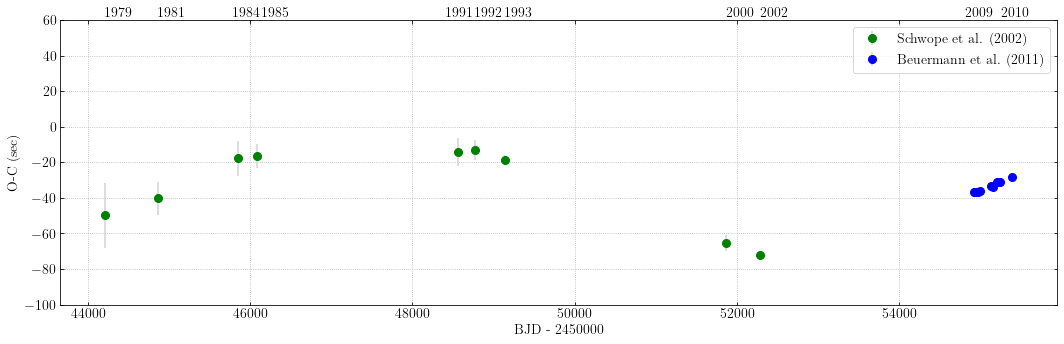

In [38]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0]
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

plt.errorbar(x1_aver, y1_aver, yerr = y1_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2_aver, y2_aver, yerr = y2_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x3_aver, y3_aver, yerr = y3_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x4_aver, y4_aver, yerr = y4_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x5_aver, y5_aver, yerr = y5_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x6_aver, y6_aver, yerr = y6_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x7_aver, y7_aver, yerr = y7_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x8_aver, y8_aver, yerr = y8_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x9_aver, y9_aver, yerr = y9_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

plt.errorbar(x10_aver, y10_aver, yerr = y10_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11_aver, y11_aver, yerr = y11_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x12_aver, y12_aver, yerr = y12_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x13_aver, y13_aver, yerr = y13_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x14_aver, y14_aver, yerr = y14_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x15_aver, y15_aver, yerr = y15_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x16_aver, y16_aver, yerr = y16_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x17_aver, y17_aver, yerr = y17_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x18_aver, y18_aver, yerr = y18_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')



#Schwope_2002
plt.text(x1_aver, 62, '1979')
plt.text(x2_aver, 62, '1981')
plt.text(x3_aver-60, 62, '1984')
plt.text(x4_aver+60, 62, '1985')
plt.text(x5_aver-150, 62, '1991')
plt.text(x6_aver, 62, '1992')
plt.text(x7_aver, 62, '1993')
plt.text(x8_aver, 62, '2000')
plt.text(x9_aver, 62, '2002')

plt.text(x10_aver-100, 62, '2009')
plt.text(x16_aver+50, 62, '2010')
#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-100,60)
plt.xlabel('BJD - '+str(2450000))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.show()

In [39]:
#Input file: Beuermann_2011
DP_Leo_Kittipong_2020 = open("Kittipong_2020.dat",'r').readlines()
N_dpleo_Kittipong_2020 = len(DP_Leo_Kittipong_2020)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Kittipong_2020.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [40]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Kittipong_2020))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Kittipong_2020)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 56670.3468 2014-01-13 08:19:23.519994
1 56717.36838 2014-03-01 08:50:28.031989
2 56748.30038 2014-04-01 07:12:32.831992
3 57100.33873 2015-03-19 08:07:46.271996
4 57101.14947 2015-03-20 03:35:14.208005
5 57748.28885 2016-12-26 06:55:56.640011
6 57748.3512 2016-12-26 08:25:43.679992
7 57802.23274 2017-02-18 05:35:08.735990
8 57802.41981 2017-02-18 10:04:31.583989
9 57829.36056 2017-03-17 08:39:12.383995
10 58140.42649 2018-01-22 10:14:08.735998
11 58200.23247 2018-03-23 05:34:45.408014
12 58542.41741 2019-02-28 10:01:04.224019
13 58580.08456 2019-04-07 02:01:45.983988
14 58851.30061 2020-01-03 07:12:52.703982
15 58870.25891 2020-01-22 06:12:49.823987
16 58870.38364 2020-01-22 09:12:26.496011
17 58871.19434 2020-01-23 04:39:50.975993
18 58871.25674 2020-01-23 06:09:42.336008
19 58873.31471 2020-01-25 07:33:10.944005
20 58873.43944 2020-01-25 10:32:47.615988
21 58880.17462 2020-02-01 04:11:27.168015
22 58909.29806 2020-03-01 07:09:12.383995
23 58926.13602 2020-03-18 03:15:52.128008
24 5

In [41]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT_err = [i for i in range(N_dpleo_Kittipong_2020)]
E_af = [i for i in range(N_dpleo_Kittipong_2020)] #float number
E_ak = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
E_aj = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
P_aE = [i for i in range(N_dpleo_Kittipong_2020)]
P_err_aE = [i for i in range(N_dpleo_Kittipong_2020)]
T_aC_linear = [i for i in range(N_dpleo_Kittipong_2020)]
T_aO_linear = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_a = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_std_a = [i for i in range(N_dpleo_Kittipong_2020)]

In [42]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Kittipong_2020):
    BJD_time = np.array(T_obs) + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
#    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    print ('%0.2f\t%0.2f' %(OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Kittipong_2020.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
4.99	3.46
4.70	2.59
7.30	1.73
16.24	2.61
18.23	2.61
32.26	1.93
31.15	1.93
34.95	2.74
33.35	2.74
33.52	4.42
39.67	2.85
40.87	2.87
42.83	4.58
42.23	4.59
46.34	3.88
45.98	3.89
46.35	3.15
44.89	3.89
48.10	5.48
47.77	3.15
48.14	3.89
47.54	4.68
46.89	3.17
46.24	4.69
45.60	3.92


In [43]:
#Plot O-C vs BJD
Input_Kittipong_2020  = 'Kittipong_2020.out'
Data_Kittipong_2020   = np.genfromtxt(Input_Kittipong_2020)

N = 2450000
BJD_time_Kittipong_2020 = Data_Kittipong_2020[:,0] - N
Cycle_Kittipong_2020 = Data_Kittipong_2020[:,1]
T_O_linear_Kittipong_2020 = Data_Kittipong_2020[:,2]
T_C_linear_Kittipong_2020 = Data_Kittipong_2020[:,3]
OC_s_Kittipong_2020 = Data_Kittipong_2020[:,4]
OC_s_err_Kittipong_2020 = Data_Kittipong_2020[:,5]

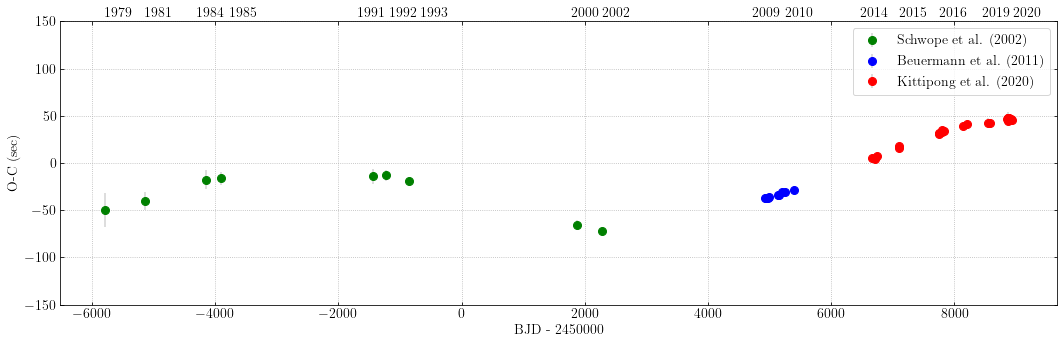

In [44]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
#plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
#                    ecolor='lightgray', label = 'Schwope et al. (2002)')

x1 = x1_aver - 2450000 + 2400000
x2 = x2_aver - 2450000 + 2400000
x3 = x3_aver - 2450000 + 2400000
x4 = x4_aver - 2450000 + 2400000
x5 = x5_aver - 2450000 + 2400000
x6 = x6_aver - 2450000 + 2400000
x7 = x7_aver - 2450000 + 2400000
x8 = x8_aver - 2450000 + 2400000
x9 = x9_aver - 2450000 + 2400000
x10 = x10_aver - 2450000 + 2400000
x11 = x11_aver - 2450000 + 2400000
x12 = x12_aver - 2450000 + 2400000
x13 = x13_aver - 2450000 + 2400000
x14 = x14_aver - 2450000 + 2400000
x15 = x15_aver - 2450000 + 2400000
x16 = x16_aver - 2450000 + 2400000
x17 = x17_aver - 2450000 + 2400000
x18 = x18_aver - 2450000 + 2400000

#print(x1)


plt.errorbar(x1, y1_aver, yerr = y1_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')
plt.errorbar(x2, y2_aver, yerr = y2_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x3, y3_aver, yerr = y3_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x4, y4_aver, yerr = y4_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x5, y5_aver, yerr = y5_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x6, y6_aver, yerr = y6_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x7, y7_aver, yerr = y7_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x8, y8_aver, yerr = y8_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')
plt.errorbar(x9, y9_aver, yerr = y9_std, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

plt.errorbar(x10, y10_aver, yerr = y10_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'Beuermann et al. (2011)')
plt.errorbar(x11, y11_aver, yerr = y11_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x12, y12_aver, yerr = y12_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x13, y13_aver, yerr = y13_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x14, y14_aver, yerr = y14_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x15, y15_aver, yerr = y15_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x16, y16_aver, yerr = y16_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x17, y17_aver, yerr = y17_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')
plt.errorbar(x18, y18_aver, yerr = y18_std, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray')

plt.errorbar(BJD_time_Kittipong_2020, OC_s_Kittipong_2020, yerr= OC_s_err_Kittipong_2020, fmt='o', markersize=8, color='red',
                    ecolor='lightgray', label = 'Kittipong et al. (2020)')

#Schwope_2002
plt.text(x1, 155, '1979')
plt.text(x2, 155, '1981')
plt.text(x3-150, 155, '1984')
plt.text(x4+150, 155, '1985')
plt.text(x5-250, 155, '1991')
plt.text(x6+70, 155, '1992')
plt.text(x7+200, 155, '1993')
plt.text(x8-100, 155, '2000')
plt.text(x9, 155, '2002')

plt.text(x10-200, 155, '2009')
plt.text(x16+50, 155, '2010')

plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
plt.text(BJD_time_Kittipong_2020[3], 155, '2015')
plt.text(BJD_time_Kittipong_2020[5], 155, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 155, '2017')
#plt.text(BJD_time_Kittipong_2020[10], 155, '2018')
plt.text(BJD_time_Kittipong_2020[12]-100, 155, '2019')
plt.text(BJD_time_Kittipong_2020[14]+100, 155, '2020')


#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-150,150)
plt.xlabel('BJD - '+str(2450000))
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("OC_Schwope_2002.jpg", dpi=1000)
plt.savefig("Weighted_mean_calculation_rev1.jpg", dpi=1000)
plt.show()